In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import glob
import os
import pandas as pd

from tqdm import tqdm
import seaborn as sns
import random
import soundfile as sf

In [2]:
df = pd.read_csv('../../Grabaciones curadas/data_catalog.csv')
df = df.query("rana_label == 'BOAFAB' and quality_label == 'C'")

In [3]:
## Auxiliar functions
def load_audio(obs, verbose=False):
    wav_path = obs.file_wav
    audio, sr = librosa.load(f'../../Grabaciones curadas/Grabaciones curadas/{wav_path}', sr=16_000)
    if verbose:
        print(obs)

    return audio, sr

def truncate_audio(audio, slice_1, slice_2):
    new_audio = audio[slice_1:slice_2]

    return new_audio

def make_plot(audio_array, sample_rate):
    plt.figure().set_figwidth(14)
    librosa.display.waveshow(audio_array, sr=sample_rate)

    ## Espectograma
    D = librosa.stft(audio_array)
    # Convert the complex-valued result to magnitude
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
    # Display the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Frecuencia Real')
    plt.show()

def get_completation(audio, init_sec, end_sec, sr, samples=1):
    slice_1 = int(init_sec * sr); slice_2 = int(end_sec * sr)

    n_to_sec = sr - (slice_2 - slice_1)
    index_to_roll = list(range(n_to_sec)) 
    random.shuffle(index_to_roll)
    
    res = {}
    for i in range(samples):
        try:
            left_index = index_to_roll.pop()
        except:
            break
        try:
            slice_1_temp = slice_1 - left_index
            right_index = n_to_sec - left_index
            slice_2_temp = slice_2 + right_index
            sample_audio = truncate_audio(audio, slice_1_temp, slice_2_temp)
            res[i] = sample_audio
        except:
            continue

    return res


def save_audios(dict_audios, sr, audio_path, mark):
    for key in dict_audios:
        audio = dict_audios[key]
        
        new_path = f'{mark}_{key}_{audio_path}'
        sf.write(f'../data/train_gen/BOAFAB/{new_path}', audio, sr)

## Audios menores a un segundo $lenght <= 1 \ sec$ 

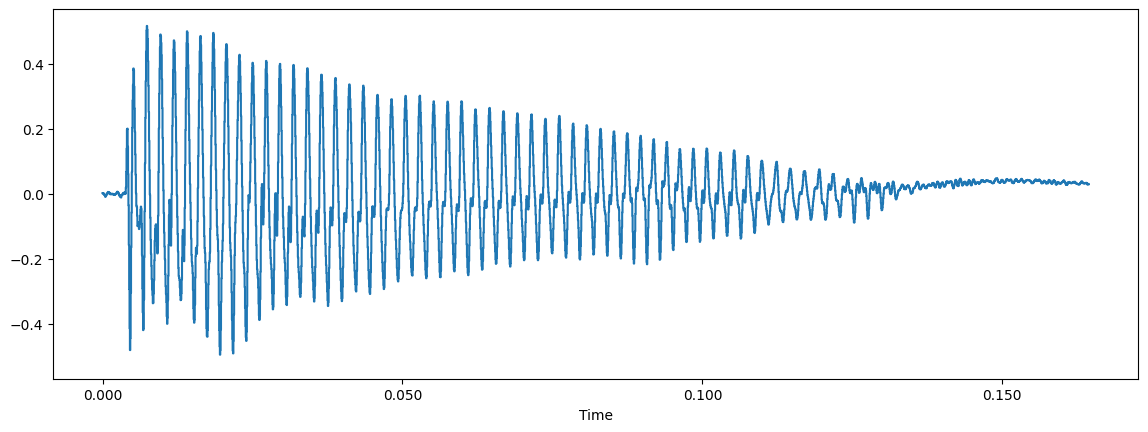

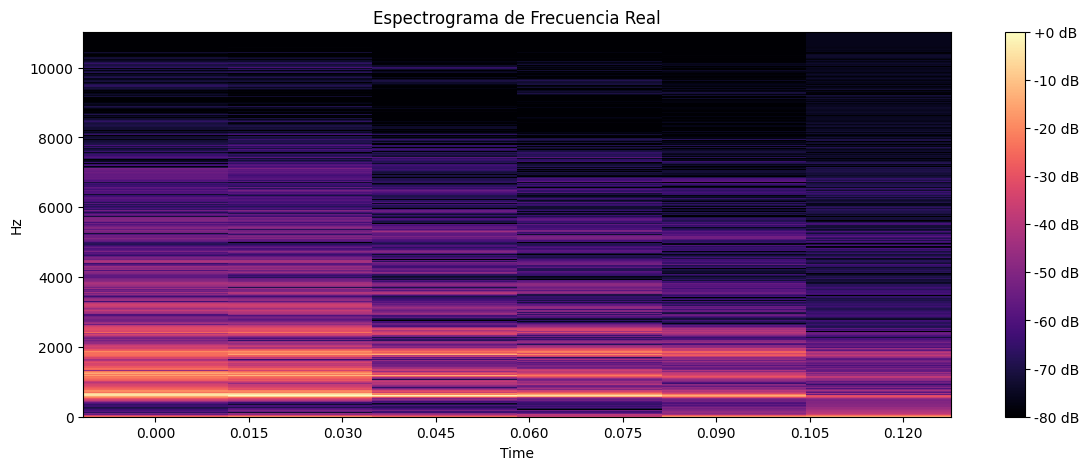

In [4]:
df_leq_one_sec = df.loc[df.length <= 1]
obs = df_leq_one_sec.iloc[40]
audio, sr = load_audio(obs)
slice_1 = int(obs.init * sr); slice_2 = int(obs.end * sr)

new_audio = truncate_audio(audio, slice_1, slice_2)
make_plot(new_audio, sr)
Audio(data=new_audio, rate=sr)                

In [5]:
# res = get_completation(audio, obs.init, obs.end, sr, 100)
new_audio = res[50]
make_plot(new_audio, sr)
Audio(data=new_audio, rate=sr)

NameError: name 'res' is not defined

### Ahora sí

In [8]:
for i, obs in tqdm(df_leq_one_sec.iterrows()):
    audio, sr = load_audio(obs)
    res = get_completation(audio, obs.init, obs.end, sr, 100)
    save_audios(res, sr, obs.file_wav, i)

117it [04:57,  2.55s/it]


## Audios mayores a un segundo $lenght >= 1 \ sec$ 

In [ ]:
def get_all_secs(audio, slice_1, slice_2):
    # rolling overlaping window
    pass

init                                                      0.985377
end                                                     105.435355
length                                                  104.449978
rana_label                                                  BOAFAB
quality_label                                                    C
label                                                     BOAFAB_C
file             FNJV_0051350_Boana_faber_Cananeia_SP_Simone De...
is_def                                                        True
file_wav         FNJV_0051350_Boana_faber_Cananeia_SP_Simone De...
Name: 64, dtype: object


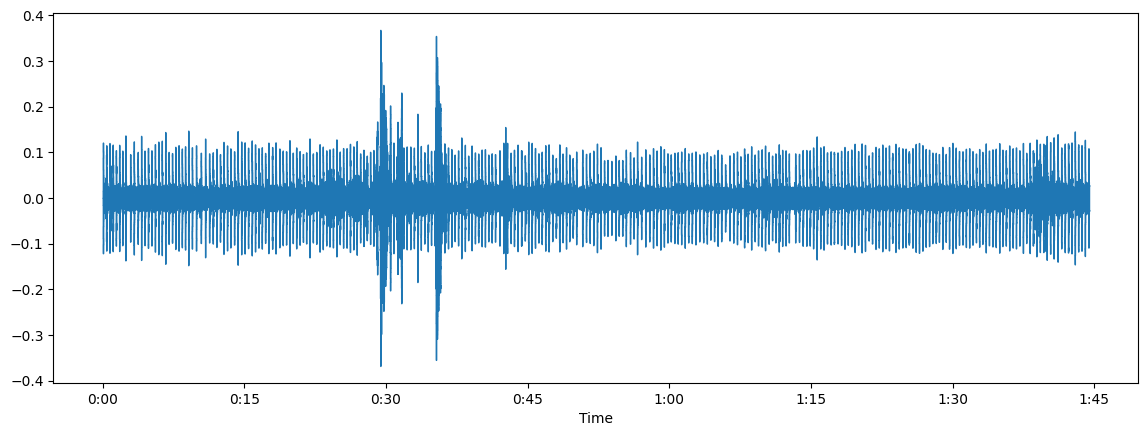

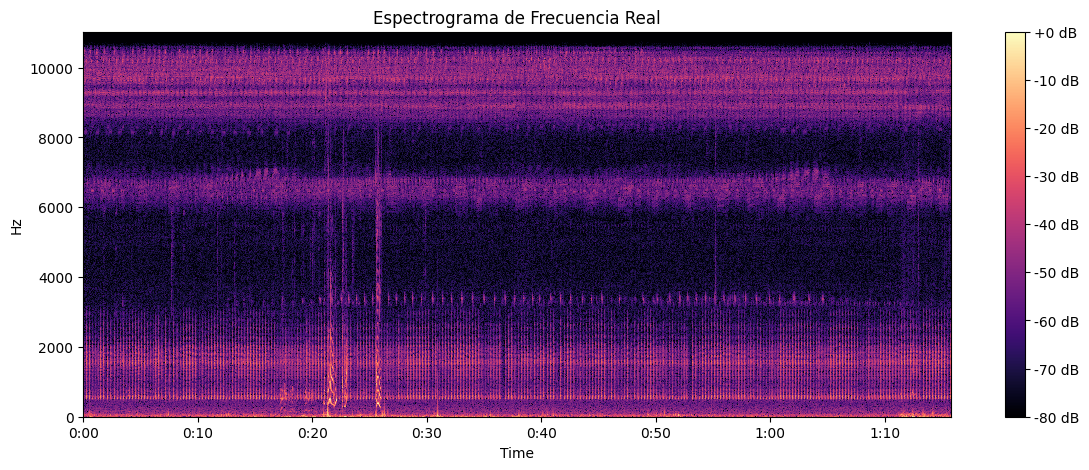

In [13]:
df_geq_one_sec = df.loc[df.length > 1]
obs = df_geq_one_sec.iloc[0]
audio, sr = load_audio(obs, verbose=True)
slice_1 = int(obs.init * sr); slice_2 = int(obs.end * sr)

new_audio = truncate_audio(audio, slice_1, slice_2)
make_plot(new_audio, sr)
Audio(data=new_audio, rate=sr)         